# ARIMA

In [1]:
# use airline passenger dataset
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

File ‘airline_passengers.csv’ already there; not retrieving.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# pull the dataset into a dataframe
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [4]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
# create logged passengers column
df['LogPassengers'] = np.log(df['Passengers'])

In [6]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [7]:
# let's use pmdarima
import pmdarima as pm

In [8]:
# call auto arima
model = pm.auto_arima(train['Passengers'], 
                      trace=True, # see what models are tested out in the fitting
                      suppress_warnings=True,
                      seasonal=True,
                      m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.24 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.23 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=0.65 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.24 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=907.060, Time=1.88 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.23 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.42 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.10 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.27 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   :

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Sun, 03 Apr 2022   AIC                            905.686
Time:                                    18:27:37   BIC                            919.623
Sample:                                         0   HQIC                           911.346
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
# predict on our test set
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

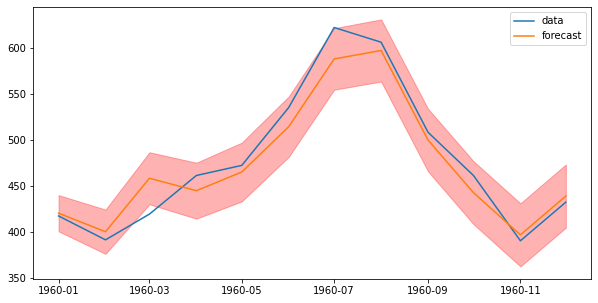

In [11]:
# plot the predictions and confidence interval
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)
ax.legend();

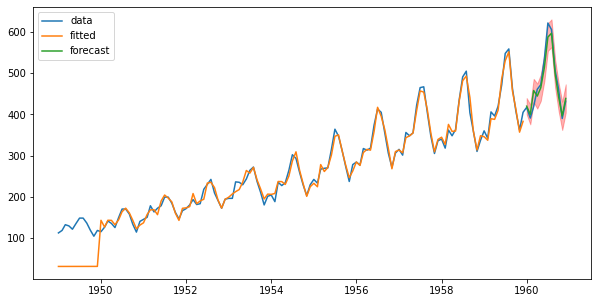

In [12]:
# plot the forecast and in sample predictions
train_pred = model.predict_in_sample(start=0, end=-1)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df['Passengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)
ax.legend();

In [13]:
# now let's try the log model
logmodel = pm.auto_arima(train['LogPassengers'],
                         trace=True,
                         suppress_warnings=True,
                         seasonal=True,
                         m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-438.489, Time=1.91 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=0.82 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.52 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.02 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.327, Time=1.45 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.783, Time=0.57 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.329, Time=3.20 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.716, Time=1.66 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=2.78 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.570, Time=0.99 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.42 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-439.579, Time=1.52 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.542, Time=2.36 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [14]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Sun, 03 Apr 2022   AIC                           -448.051
Time:                                      18:32:34   BIC                           -434.114
Sample:                                           0   HQIC                          -442.391
                                              - 132                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0191      0.009      2.144      0.032       0.002       0.037
ar.L1          0.6013      0.082      7.289      0.000       0.440       0.763
ar.L2          0.2415      0.085      2.850      0.004       0.075       0.408
ma.S.L12      -0.5677      0.105     -5.428      0.000      -0.773      -0.363
sigma2         0.0012      0.000      8.193      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.04
Prob(Q):                              0.99   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

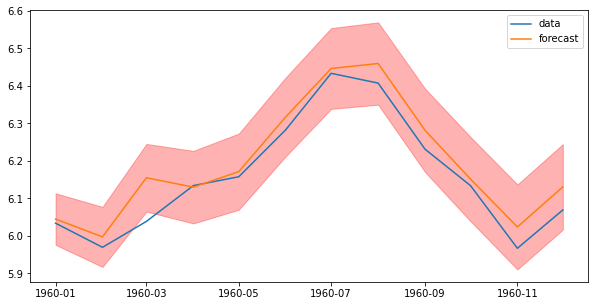

In [15]:
test_pred_log, confint_log = logmodel.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, confint_log[:,0], confint_log[:,1], color='red', alpha=0.3)
ax.legend();

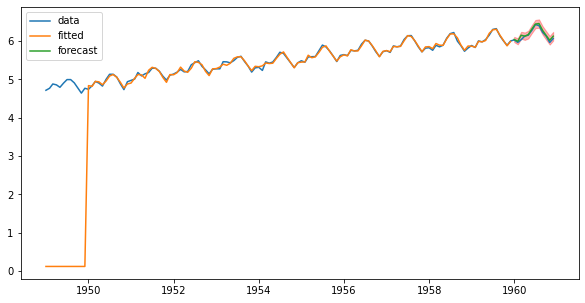

In [16]:
train_pred_log = logmodel.predict_in_sample(start=0, end=-1)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index, train_pred_log, label='fitted')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, confint_log[:,0], confint_log[:,1], color='red', alpha=0.3)
ax.legend();

In [17]:
# forecast RMSE - hard to eyeball
def rmse(t, y):
    return np.sqrt(np.mean((t - y)**2))

In [18]:
print("Non-logged RMSE: ", rmse(test['Passengers'], test_pred))
print("Logged RMSE: ", rmse(test['Passengers'], np.exp(test_pred_log)))

Non-logged RMSE:  18.53646891407833
Logged RMSE:  23.037926228059714


In [19]:
# try nonseasonal with logged data
model = pm.auto_arima(train['LogPassengers'], 
                      trace=True,
                      suppress_warnings=True,
                      max_p=12, max_q=2, max_order=14,
                      stepwise=True,
                      seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-240.134, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-211.983, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-214.718, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-216.493, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-212.867, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-246.296, Time=0.41 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-246.270, Time=0.43 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-251.120, Time=0.52 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-227.139, Time=0.40 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-250.014, Time=0.57 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-226.954, Time=0.66 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=-233.612, Time=0.28 sec

Best model:  ARIMA(4,1,2)(0,0,0)[0] interc

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(4, 1, 2)   Log Likelihood                 133.560
Date:                Sun, 03 Apr 2022   AIC                           -251.120
Time:                        18:39:52   BIC                           -228.118
Sample:                             0   HQIC                          -241.773
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0099      0.002      5.531      0.000       0.006       0.013
ar.L1          0.0436      0.122      0.359      0.720      -0.195       0.282
ar.L2          0.4369      0.115      3.793      0.000       0.211       0.663
ar.L3         -0.2256      0.097     -2.333      0.020      -0.415      -0.036
ar.L4         -0.2231      0.102     -2.189      0.029      -0.423      -0.023
ma.L1         -0.0591      0.080     -0.741      0.459      -0.216       0.097
ma.L2         -0.8676      0.078    -11.185      0.000      -1.020      -0.716
sigma2         0.0073      0.001      5.708      0.000       0.005       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 5.73
Prob(Q):                              0.94   Prob(JB):                         0.06
Heteroskedasticity (H):               1.05   Skew:                             0.20
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

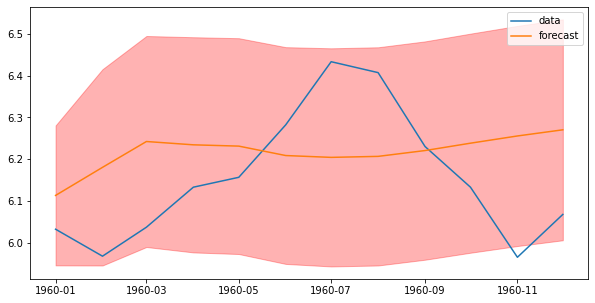

In [21]:
# this forecast is pretty bad
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)
ax.legend();

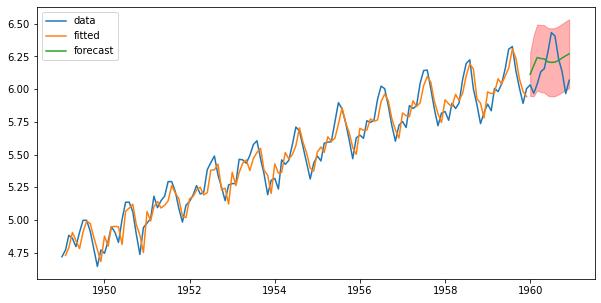

In [23]:
# still not great
train_pred = model.predict_in_sample(start=1, end=-1)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index[1:], train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)
ax.legend();

In [24]:
# check RMSE
rmse(test['Passengers'], np.exp(test_pred))

82.30266753386995

Yikes!

In [25]:
# Now let's redo this using a full grid search
model = pm.auto_arima(train['LogPassengers'], 
                      trace=True,
                      suppress_warnings=True,
                      max_p=12, max_q=2, max_order=14,
                      stepwise=False,
                      seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-211.983, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-216.493, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-214.718, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-221.069, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-216.622, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-240.134, Time=0.25 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-216.024, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-246.270, Time=0.36 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-246.296, Time=0.31 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-229.057, Time=0.15 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-227.139, Time=0.33 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-251.120, Time=0.47 sec
 ARIMA(5,1,0)(0,0,0)[0] i

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 1, 1)   Log Likelihood                 226.862
Date:                Sun, 03 Apr 2022   AIC                           -423.724
Time:                        18:46:57   BIC                           -380.596
Sample:                             0   HQIC                          -406.200
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0063      0.006      1.142      0.254      -0.005       0.017
ar.L1          0.0301      0.087      0.346      0.729      -0.140       0.200
ar.L2         -0.0759      0.067     -1.132      0.258      -0.207       0.055
ar.L3         -0.0360      0.066     -0.544      0.586      -0.166       0.094
ar.L4         -0.0984      0.070     -1.408      0.159      -0.235       0.039
ar.L5          0.0003      0.064      0.004      0.996      -0.126       0.127
ar.L6         -0.0551      0.066     -0.833      0.405      -0.185       0.075
ar.L7         -0.0395      0.071     -0.560      0.576      -0.178       0.099
ar.L8         -0.1199      0.065     -1.852      0.064      -0.247       0.007
ar.L9          0.0046      0.077      0.060      0.952      -0.146       0.155
ar.L10        -0.0699      0.064     -1.087      0.277      -0.196       0.056
ar.L11         0.0038      0.070      0.054      0.957      -0.134       0.142
ar.L12         0.7980      0.062     12.889      0.000       0.677       0.919
ma.L1         -0.3810      0.121     -3.151      0.002      -0.618      -0.144
sigma2         0.0016      0.000      7.049      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.83   Prob(JB):                         0.27
Heteroskedasticity (H):               0.37   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

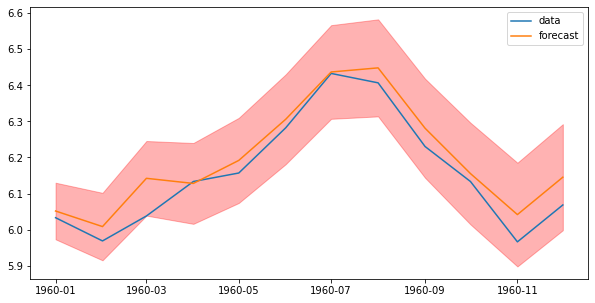

In [27]:
# much better
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)
ax.legend();

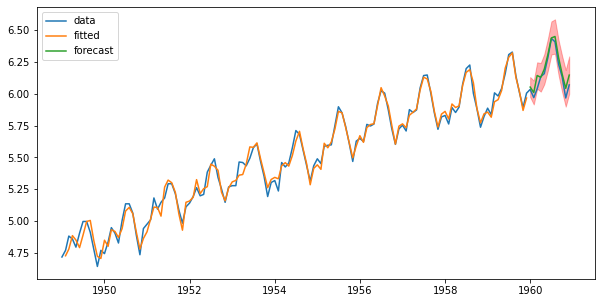

In [28]:
train_pred = model.predict_in_sample(start=1, end=-1)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index[1:], train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)
ax.legend();

In [29]:
# recheck RMSE
rmse(test['Passengers'], np.exp(test_pred))

23.253818232729564

NOTE: auto_arima may not find the best model using the default settings